In [2]:
import pandas as pd
import pyarrow
import geopandas
import matplotlib.pyplot as plt
import raster2xyz
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
import numpy as np
from itertools import chain

In [13]:
# from parquet to csv
file = pd.read_parquet('../../finalproj_data/input_data/data_v3.parquet', engine = 'pyarrow')

In [14]:
file = file.loc[:,['lat', 'lon', 'label']]

In [15]:

file.head()

,lat,lon,label
0,-4.98565,106.360530,water
1,-4.98565,106.405485,water
2,-4.98565,106.450441,water
3,-4.98565,106.495396,water
4,-4.98565,106.540352,water


In [16]:
gdf = geopandas.GeoDataFrame(file, geometry=geopandas.points_from_xy(file.lon, file.lat))

In [17]:
gdf.head()

,lat,lon,label,geometry
0,-4.98565,106.360530,water,POINT (106.36053 -4.98565)
1,-4.98565,106.405485,water,POINT (106.40549 -4.98565)
2,-4.98565,106.450441,water,POINT (106.45044 -4.98565)
3,-4.98565,106.495396,water,POINT (106.49540 -4.98565)
4,-4.98565,106.540352,water,POINT (106.54035 -4.98565)


In [8]:
gdf['label'].value_counts()

water          661027
land           370977
burned           2234
active_fire       138
Name: label, dtype: int64

In [43]:
# gdf.to_file('../../finalproj_data/input_data/gdf.shp')

In [21]:
# Change to Numeric
gdf.loc[(gdf['label']=='water'), 'label'] = 0
gdf.loc[(gdf['label']=='land'), 'label'] = 1
gdf.loc[(gdf['label']=='burned'), 'label'] = 2
gdf.loc[(gdf['label']=='active_fire'), 'label'] = 3

In [22]:
gdf['label'].value_counts()

0    661027
1    370977
2      2234
3       138
Name: label, dtype: int64

### Plot

In [11]:
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}

gdf = gdf.to_crs(epsg=3857)

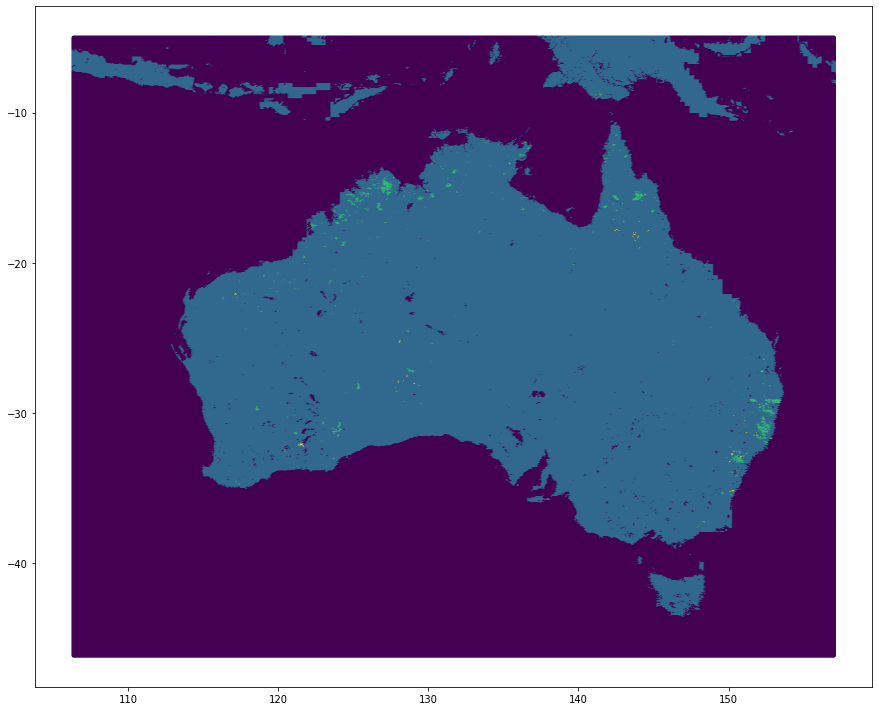

In [23]:
gdf.plot(['label'], markersize = 5, figsize = (15, 15))

# import model predictions

In [24]:
pred = geopandas.read_file('../../finalproj_data/model_predictions/model_pred.shp')

In [26]:
pred.head()

,lat,lon,prediction,geometry
0,-4.98565,106.360530,water,POINT (106.36053 -4.98565)
1,-4.98565,106.405485,water,POINT (106.40549 -4.98565)
2,-4.98565,106.450441,water,POINT (106.45044 -4.98565)
3,-4.98565,106.495396,water,POINT (106.49540 -4.98565)
4,-4.98565,106.540352,water,POINT (106.54035 -4.98565)


In [27]:
# Change to Numeric
pred.loc[(pred['prediction']=='water'), 'prediction'] = 0
pred.loc[(pred['prediction']=='land'), 'prediction'] = 1
pred.loc[(pred['prediction']=='burned'), 'prediction'] = 2
pred.loc[(pred['prediction']=='active_fire'), 'prediction'] = 3

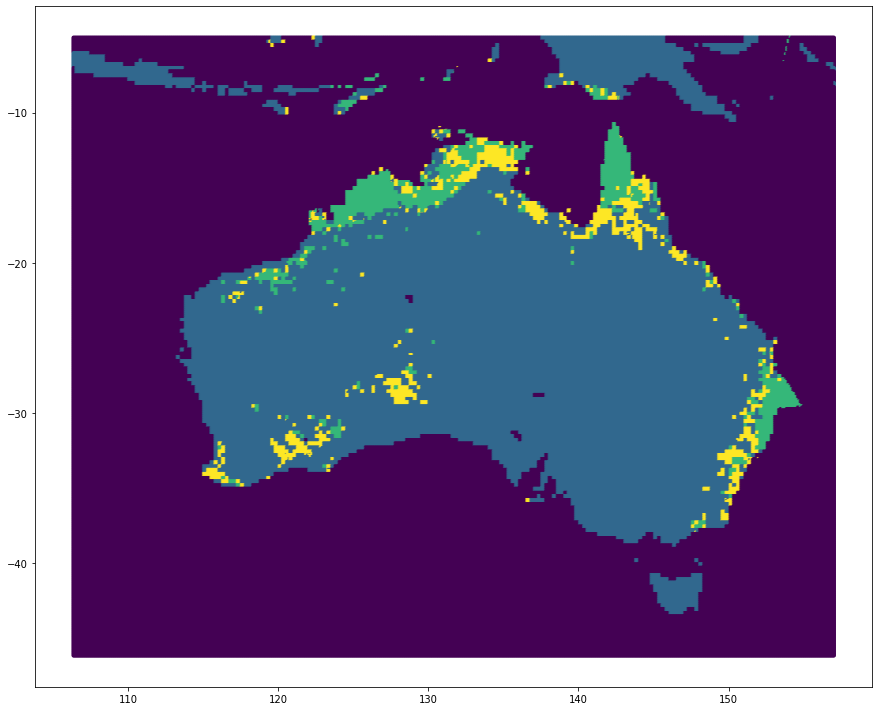

In [29]:
pred.plot(['prediction'], markersize = 5, figsize = (15, 15))

## Create slide for Features

In [52]:
df = pd.read_excel('../../featureimportance.xlsx')

In [53]:
df = df['Unnamed: 3'].value_counts()

In [54]:
for i in df.index:
    print(i)

Soil moisture
Soil temperature
Baseflow-groundwater runoff
Root zone soil moisture
Average surface skin temperature
Latent heat net flux
Potential evaporation rate
Snapshot of hourly precipitation rate adjusted to rain gauge
Total precipitation rate
Pressure
Air temperature
Wind speed
Plant canopy surface water
Albedo
Specific humidity
Downward long-wave radiation flux
Evapotranspiration
Net long-wave radiation flux
Net short wave radiation flux
Snapshot of hourly precipitation rate
Direct evaporation from bare soil


In [55]:
len(df.index)

21